## Final analysis - THESIS 2025
Total:46 participants. 2BLV. Balanced final sample: 44 Participants / 15 experienced vs 15 randomly sampled non-experienced (May, 2025)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as scistats
import csv

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.patches import Rectangle
import seaborn as sns
import pingouin as pg

In [2]:
import astropy
from astropy import stats

In [3]:
data = pd.read_csv("data/data_clean.csv", delimiter=';')
data

,Start time,Completion time,Email,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45
0,NaN,NaN,RESULTS,Sonification,Music,Music,Sonification,Sonification,Music,Music,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/8/22 11:29:21,12/8/22 12:11:53,anonymous,Sonification,Music,Music,Music,Music,Music,Music,...,Entre 45 y 54,España,7.0,9.0,6.0,8.0,10.0,9.0,9.0,10.0
2,12/11/22 16:39:30,12/11/22 17:06:42,anonymous,Sonification,Sonification,Sonification,Sonification,Music,Sonification,Sonification,...,Más de 65,España,7.0,9.0,7.0,8.0,9.0,9.0,9.0,9.0
3,12/11/22 18:13:31,12/11/22 18:30:53,anonymous,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 55 y 64,España,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
4,12/11/22 18:28:52,12/11/22 18:44:49,anonymous,Sonification,Sonification,Music,Sonification,Music,Sonification,Sonification,...,Entre 45 y 54,España,3.0,6.0,7.0,5.0,6.0,5.0,5.0,5.0
5,12/11/22 18:36:17,12/11/22 19:10:36,anonymous,Music,Music,Music,Music,Music,Music,Music,...,Entre 55 y 64,España,3.0,8.0,7.0,7.0,8.0,6.0,7.0,3.0
6,12/11/22 18:29:03,12/11/22 19:50:22,anonymous,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 55 y 64,España,1.0,10.0,10.0,9.0,9.0,10.0,5.0,5.0
7,12/11/22 21:15:40,12/11/22 21:47:19,anonymous,Music,Music,Music,Sonification,Sonification,Music,Sonification,...,Entre 35 y 44,España,4.0,4.0,4.0,5.0,6.0,3.0,7.0,8.0
8,12/11/22 21:11:36,12/11/22 21:57:40,anonymous,Music,Music,Music,Music,Music,Sonification,Sonification,...,Entre 55 y 64,España,3.0,7.0,7.0,9.0,10.0,7.0,5.0,8.0
9,12/11/22 21:49:45,12/11/22 23:08:49,anonymous,Music,Sonification,Music,Sonification,Sonification,Sonification,Sonification,...,Entre 55 y 64,España,2.0,4.0,2.0,6.0,3.0,7.0,6.0,5.0


## Experts

In [18]:
experts_list = []
experts_index = []
experts_counter = 0
for j in range(len(data)):
    if (((data.Q32[j] != "Blind") and (data.Q31[j] == "Musician") and (data.Q21[j] != "Astronomer")) or ((data.Q31[j] == "Musician") and (data.Q21[j] == "Astronomer")) or((data.Q31[j] != "Musician") and (data.Q21[j] == "Astronomer")) and (data.Email[j] != 'RESULTS')):
        experts_counter += 1
        current_row = data.iloc[j]
        experts_list.append(current_row)
        experts_index.append(j)
        
print("Number of experts:", experts_counter)
experts_df = pd.DataFrame(experts_list)
experts_df

Number of experts: 15


,Start time,Completion time,Email,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45
6,12/11/22 18:29:03,12/11/22 19:50:22,anonymous,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 55 y 64,España,1.0,10.0,10.0,9.0,9.0,10.0,5.0,5.0
7,12/11/22 21:15:40,12/11/22 21:47:19,anonymous,Music,Music,Music,Sonification,Sonification,Music,Sonification,...,Entre 35 y 44,España,4.0,4.0,4.0,5.0,6.0,3.0,7.0,8.0
26,12/16/22 10:38:46,12/16/22 11:09:38,anonymous,Music,Music,Sonification,Music,Music,Sonification,Sonification,...,Entre 25 y 34,España,6.0,7.0,7.0,10.0,9.0,7.0,9.0,10.0
27,12/16/22 13:24:21,12/16/22 13:51:45,anonymous,Music,Music,Music,Music,Sonification,Sonification,Sonification,...,Entre 25 y 34,España,6.0,7.0,6.0,10.0,7.0,8.0,5.0,5.0
30,12/18/22 21:15:43,12/18/22 21:41:39,anonymous,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 45 y 54,España,5.0,8.0,6.0,8.0,8.0,8.0,8.0,8.0
32,12/19/22 22:28:22,12/19/22 22:50:23,anonymous,Music,Music,Sonification,Sonification,Music,Sonification,Sonification,...,Entre 35 y 44,España,7.0,4.0,3.0,6.0,9.0,6.0,3.0,6.0
34,12/21/22 10:52:52,12/21/22 11:22:08,anonymous,Sonification,Sonification,Music,Sonification,Sonification,Sonification,Sonification,...,Entre 45 y 54,España,7.0,9.0,7.0,10.0,10.0,5.0,3.0,5.0
35,12/29/22 19:01:02,12/29/22 19:25:38,anonymous,Music,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 35 y 44,España,7.0,7.0,7.0,8.0,8.0,6.0,5.0,8.0
37,1/20/23 13:16:03,1/20/23 13:36:43,anonymous,Music,Music,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 35 y 44,España,5.0,3.0,2.0,7.0,6.0,5.0,4.0,3.0
38,12/15/22 21:13:01,12/15/22 21:14:56,ENG,Sonification,Sonification,Music,Sonification,Sonification,Music,Music,...,Entre 35 y 44,España,10.0,9.0,6.0,9.0,9.0,8.0,9.0,10.0


## Non experts

In [21]:
nonexperts_list = []
#nonexperts_index = []
nonexperts_counter = 0
for j in range(len(data)):
    if ((data.Q32[j] != "Blind") and (data.Q31[j] != "Musician") and (data.Q21[j] != "Astronomer") and (data.Email[j] != 'RESULTS')):
        nonexperts_counter += 1
        current_row = data.iloc[j]
        nonexperts_list.append(current_row)
     #   nonexperts_index.append(j)
        
print("Number of nonexperts:", nonexperts_counter)
nonexperts_df = pd.DataFrame(nonexperts_list)
nonexperts_df

Number of nonexperts: 29


,Start time,Completion time,Email,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45
1,12/8/22 11:29:21,12/8/22 12:11:53,anonymous,Sonification,Music,Music,Music,Music,Music,Music,...,Entre 45 y 54,España,7.0,9.0,6.0,8.0,10.0,9.0,9.0,10.0
2,12/11/22 16:39:30,12/11/22 17:06:42,anonymous,Sonification,Sonification,Sonification,Sonification,Music,Sonification,Sonification,...,Más de 65,España,7.0,9.0,7.0,8.0,9.0,9.0,9.0,9.0
3,12/11/22 18:13:31,12/11/22 18:30:53,anonymous,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 55 y 64,España,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
4,12/11/22 18:28:52,12/11/22 18:44:49,anonymous,Sonification,Sonification,Music,Sonification,Music,Sonification,Sonification,...,Entre 45 y 54,España,3.0,6.0,7.0,5.0,6.0,5.0,5.0,5.0
5,12/11/22 18:36:17,12/11/22 19:10:36,anonymous,Music,Music,Music,Music,Music,Music,Music,...,Entre 55 y 64,España,3.0,8.0,7.0,7.0,8.0,6.0,7.0,3.0
8,12/11/22 21:11:36,12/11/22 21:57:40,anonymous,Music,Music,Music,Music,Music,Sonification,Sonification,...,Entre 55 y 64,España,3.0,7.0,7.0,9.0,10.0,7.0,5.0,8.0
9,12/11/22 21:49:45,12/11/22 23:08:49,anonymous,Music,Sonification,Music,Sonification,Sonification,Sonification,Sonification,...,Entre 55 y 64,España,2.0,4.0,2.0,6.0,3.0,7.0,6.0,5.0
10,12/12/22 10:19:49,12/12/22 10:32:16,anonymous,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 45 y 54,España,7.0,9.0,7.0,7.0,9.0,5.0,5.0,7.0
11,12/12/22 15:59:40,12/12/22 16:34:36,anonymous,Music,Music,Sonification,Sonification,Music,Sonification,Sonification,...,Más de 65,España,8.0,8.0,8.0,8.0,8.0,8.0,8.0,6.0
12,12/12/22 17:10:04,12/12/22 17:33:43,anonymous,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 55 y 64,España,4.0,7.0,6.0,7.0,7.0,5.0,6.0,6.0


## Random downsampling "Non experts" for comparison

In [22]:
nonexperts_down = nonexperts_df.sample(frac=0.53, replace=False, random_state=1)
nonexperts_down

,Start time,Completion time,Email,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45
17,12/12/22 20:09:37,12/12/22 20:45:42,anonymous,Sonification,Music,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 45 y 54,España,4.0,6.0,3.0,7.0,7.0,5.0,5.0,7.0
24,12/15/22 22:01:49,12/15/22 22:21:32,anonymous,Sonification,Sonification,Music,Sonification,Music,Sonification,Sonification,...,Entre 55 y 64,España,6.0,8.0,7.0,7.0,8.0,7.0,7.0,8.0
21,12/14/22 23:48:29,12/15/22 0:11:37,anonymous,Music,Music,Sonification,Sonification,Music,Sonification,Sonification,...,Entre 55 y 64,España,1.0,5.0,5.0,7.0,10.0,3.0,5.0,10.0
23,12/15/22 19:22:58,12/15/22 19:31:53,anonymous,Sonification,Sonification,Music,Sonification,Music,Music,Sonification,...,Más de 65,España,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
31,12/19/22 10:26:31,12/19/22 10:43:26,anonymous,Music,Sonification,Sonification,Sonification,Music,Sonification,Sonification,...,Entre 19 y 24,España,2.0,6.0,7.0,4.0,6.0,6.0,4.0,5.0
22,12/15/22 18:41:24,12/15/22 19:03:07,anonymous,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,...,Más de 65,España,4.0,8.0,7.0,8.0,8.0,8.0,6.0,3.0
4,12/11/22 18:28:52,12/11/22 18:44:49,anonymous,Sonification,Sonification,Music,Sonification,Music,Sonification,Sonification,...,Entre 45 y 54,España,3.0,6.0,7.0,5.0,6.0,5.0,5.0,5.0
13,12/12/22 17:43:05,12/12/22 17:58:08,anonymous,Sonification,Music,Sonification,Music,Music,Sonification,Sonification,...,Entre 55 y 64,España,5.0,5.0,5.0,5.0,10.0,7.0,9.0,5.0
28,12/17/22 8:41:54,12/17/22 10:33:48,anonymous,Music,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 35 y 44,España,8.0,8.0,8.0,5.0,6.0,8.0,4.0,5.0
25,12/16/22 0:47:01,12/16/22 1:14:53,anonymous,Music,Music,Music,Sonification,Music,Sonification,Sonification,...,Más de 65,España,5.0,6.0,8.0,7.0,8.0,6.0,7.0,5.0


In [23]:
nonexperts_index = []
for j in range(len(nonexperts_down)):
    nonexperts_index.append(nonexperts_down.index[j])
nonexperts_index

[17, 24, 21, 23, 31, 22, 4, 13, 28, 25, 5, 3, 29, 9, 20]

## Experts' responses

In [33]:
experts_df.Q22[experts_index[0]]

'Menos de 3'

In [34]:
Q1X = len([i for i in range(len(experts_df)) if (experts_df.Q22[experts_index[i]] == data.Q22[0])])
Q2X = len([i for i in range(len(experts_df)) if (experts_df.Q23[experts_index[i]] == data.Q23[0])])
Q3X = len([i for i in range(len(experts_df)) if (experts_df.Q24[experts_index[i]] == data.Q24[0])])
Q4X = len([i for i in range(len(experts_df)) if (experts_df.Q25[experts_index[i]] == data.Q25[0])])
Q5X = len([i for i in range(len(experts_df)) if (experts_df.Q26[experts_index[i]] == data.Q26[0])])
Q6X = len([i for i in range(len(experts_df)) if (experts_df.Q27[experts_index[i]] == data.Q27[0])])
Q7X = len([i for i in range(len(experts_df)) if (experts_df.Q28[experts_index[i]] == data.Q28[0])])
Q8X = len([i for i in range(len(experts_df)) if (experts_df.Q29[experts_index[i]] == data.Q29[0])])
Q9X = len([i for i in range(len(experts_df)) if (experts_df.Q34[experts_index[i]] == data.Q34[0])])
Q10X = len([i for i in range(len(experts_df)) if (experts_df.Q35[experts_index[i]] == data.Q35[0])])


In [35]:
experts_correct = [Q1X,Q2X,Q3X,Q4X,Q5X,Q6X,Q7X,Q8X,Q9X,Q10X]
experts_correct = np.array(experts_correct, int)
experts_correct

array([ 2,  2,  7,  8,  0,  7,  6,  7, 13,  1])

In [36]:
experts_total_responses = len(experts_df)
mean_experts_correct = np.mean(experts_correct)
median_experts_correct = np.median(experts_correct)
print("experts answers mean in %:", mean_experts_correct/experts_total_responses)
print("experts answers median:", median_experts_correct)

experts answers mean in %: 0.35333333333333333
experts answers median: 6.5


In [37]:
success_experts_correct = np.sum(experts_correct)
attempts_experts_correct = 10* experts_total_responses
conf_experts_correct = astropy.stats.binom_conf_interval(success_experts_correct, attempts_experts_correct, confidence_level=0.68269, interval='jeffreys')
print(conf_experts_correct) # Correct answers interval


[0.31539977 0.39321472]


In [38]:
experts = pd.Series(experts_correct/experts_total_responses)
experts.describe()

count    10.000000
mean      0.353333
std       0.266759
min       0.000000
25%       0.133333
50%       0.433333
75%       0.466667
max       0.866667
dtype: float64

In [39]:
# Q22 Mode: Most frequently answered
A = len([i for i in range(len(experts_df)) if (experts_df.Q22[experts_index[i]] == "Menos de 3")])
B = len([i for i in range(len(experts_df)) if (experts_df.Q22[experts_index[i]] == "3 Líneas de emisión")])
C = len([i for i in range(len(experts_df)) if (experts_df.Q22[experts_index[i]] == "4 Líneas de emisión")])
D = len([i for i in range(len(experts_df)) if (experts_df.Q22[experts_index[i]] == "5 Líneas de emisión")])
E = len([i for i in range(len(experts_df)) if (experts_df.Q22[experts_index[i]] == "Más de 5")])
print ("Q22 correct answer:", data.Q22[0])
print ("Menos de 3:", A)
print ("3 Líneas de emisión:", B)
print ("4 Líneas de emisión:", C) 
print ("5 Líneas de emisión:", D)
print ("Más de 5:", E)

Q22 correct answer: 5 Líneas de emisión
Menos de 3: 3
3 Líneas de emisión: 8
4 Líneas de emisión: 2
5 Líneas de emisión: 2
Más de 5: 0


In [40]:
# Q23 Mode: Most frequently answered
A = len([i for i in range(len(experts_df)) if (experts_df.Q23[experts_index[i]] == "Menos de 3")])
B = len([i for i in range(len(experts_df)) if (experts_df.Q23[experts_index[i]] == "3 Líneas de emisión")])
C = len([i for i in range(len(experts_df)) if (experts_df.Q23[experts_index[i]] == "4 Líneas de emisión")])
D = len([i for i in range(len(experts_df)) if (experts_df.Q23[experts_index[i]] == "5 Líneas de emisión")])
E = len([i for i in range(len(experts_df)) if (experts_df.Q23[experts_index[i]] == "Más de 5")])
print ("Q23 correct answer:", data.Q23[0])
print ("Menos de 3:", A)
print ("3 Líneas de emisión:", B)
print ("4 Líneas de emisión:", C) 
print ("5 Líneas de emisión:", D)
print ("Más de 5:", E)

Q23 correct answer: 5 Líneas de emisión
Menos de 3: 5
3 Líneas de emisión: 5
4 Líneas de emisión: 2
5 Líneas de emisión: 2
Más de 5: 1


In [41]:
# Q24 Mode: Most frequently answered
A = len([i for i in range(len(experts_df)) if (experts_df.Q24[experts_index[i]] == "Menos de 11")])
B = len([i for i in range(len(experts_df)) if (experts_df.Q24[experts_index[i]] == "11 Líneas de emisión")])
C = len([i for i in range(len(experts_df)) if (experts_df.Q24[experts_index[i]] == "12 Líneas de emisión")])
D = len([i for i in range(len(experts_df)) if (experts_df.Q24[experts_index[i]] == "13 Líneas de emisión")])
E = len([i for i in range(len(experts_df)) if (experts_df.Q24[experts_index[i]] == "Más de 13")])
print ("Q24 correct answer:", data.Q24[0])
print ("Menos de 11:", A)
print ("11 Líneas de emisión:", B)
print ("12 Líneas de emisión:", C) 
print ("13 Líneas de emisión:", D)
print ("Más de 13:", E)

Q24 correct answer: 11 Líneas de emisión
Menos de 11: 8
11 Líneas de emisión: 7
12 Líneas de emisión: 0
13 Líneas de emisión: 0
Más de 13: 0


In [42]:
# Q25 Mode: Most frequently answered
A = len([i for i in range(len(experts_df)) if (experts_df.Q25[experts_index[i]] == "Menos de 11")])
B = len([i for i in range(len(experts_df)) if (experts_df.Q25[experts_index[i]] == "11 Líneas de emisión")])
C = len([i for i in range(len(experts_df)) if (experts_df.Q25[experts_index[i]] == "12 Líneas de emisión")])
D = len([i for i in range(len(experts_df)) if (experts_df.Q25[experts_index[i]] == "13 Líneas de emisión")])
E = len([i for i in range(len(experts_df)) if (experts_df.Q25[experts_index[i]] == "Más de 13")])
print ("Q25 correct answer:", data.Q25[0])
print ("Menos de 11:", A)
print ("11 Líneas de emisión:", B)
print ("12 Líneas de emisión:", C) 
print ("13 Líneas de emisión:", D)
print ("Más de 13:", E)

Q25 correct answer: 11 Líneas de emisión
Menos de 11: 7
11 Líneas de emisión: 8
12 Líneas de emisión: 0
13 Líneas de emisión: 0
Más de 13: 0


In [43]:
# Q26 Mode: Most frequently answered
A = len([i for i in range(len(experts_df)) if (experts_df.Q26[experts_index[i]] == "Menos de 12")])
B = len([i for i in range(len(experts_df)) if (experts_df.Q26[experts_index[i]] == "12 Líneas de absorción")])
C = len([i for i in range(len(experts_df)) if (experts_df.Q26[experts_index[i]] == "13 Líneas de absorción")])
D = len([i for i in range(len(experts_df)) if (experts_df.Q26[experts_index[i]] == "14 Líneas de absorción")])
E = len([i for i in range(len(experts_df)) if (experts_df.Q26[experts_index[i]] == "Más de 14")])
print ("Q26 correct answer:", data.Q26[0])
print ("Menos de 12:", A)
print ("12 Líneas de absorción:", B)
print ("13 Líneas de absorción:", C) 
print ("14 Líneas de absorción:", D)
print ("Más de 14:", E)

Q26 correct answer: 13 Líneas de absorción
Menos de 12: 13
12 Líneas de absorción: 1
13 Líneas de absorción: 0
14 Líneas de absorción: 0
Más de 14: 1


In [44]:
# Q27 Mode: Most frequently answered
A = len([i for i in range(len(experts_df)) if (experts_df.Q27[experts_index[i]] == "Menos de 11")])
B = len([i for i in range(len(experts_df)) if (experts_df.Q27[experts_index[i]] == "11 Líneas de absorción")])
C = len([i for i in range(len(experts_df)) if (experts_df.Q27[experts_index[i]] == "12 Líneas de absorción")])
D = len([i for i in range(len(experts_df)) if (experts_df.Q27[experts_index[i]] == "13 Líneas de absorción")])
E = len([i for i in range(len(experts_df)) if (experts_df.Q27[experts_index[i]] == "Más de 13")])
print ("Q27 correct answer:", data.Q27[0])
print ("Menos de 11:", A)
print ("11 Líneas de absorción:", B)
print ("12 Líneas de absorción:", C) 
print ("13 Líneas de absorción:", D)
print ("Más de 13:", E)

Q27 correct answer: 12 Líneas de absorción
Menos de 11: 8
11 Líneas de absorción: 0
12 Líneas de absorción: 7
13 Líneas de absorción: 0
Más de 13: 0


In [45]:
# Q28 Mode: Most frequently answered
A = len([i for i in range(len(experts_df)) if (experts_df.Q28[experts_index[i]] == "Menos de 12")])
B = len([i for i in range(len(experts_df)) if (experts_df.Q28[experts_index[i]] == "12 Líneas de absorción")])
C = len([i for i in range(len(experts_df)) if (experts_df.Q28[experts_index[i]] == "13 Líneas de absorción")])
D = len([i for i in range(len(experts_df)) if (experts_df.Q28[experts_index[i]] == "14 Líneas de absorción")])
E = len([i for i in range(len(experts_df)) if (experts_df.Q28[experts_index[i]] == "Más de 14")])
print ("Q28 correct answer:", data.Q28[0])
print ("Menos de 12:", A)
print ("12 Líneas de absorción:", B)
print ("13 Líneas de absorción:", C) 
print ("14 Líneas de absorción:", D)
print ("Más de 14:", E)

Q28 correct answer: 13 Líneas de absorción
Menos de 12: 8
12 Líneas de absorción: 1
13 Líneas de absorción: 6
14 Líneas de absorción: 0
Más de 14: 0


In [46]:
# Q29 Mode: Most frequently answered
A = len([i for i in range(len(experts_df)) if (experts_df.Q29[experts_index[i]] == "Menos de 12")])
B = len([i for i in range(len(experts_df)) if (experts_df.Q29[experts_index[i]] == "12 Líneas de absorción")])
C = len([i for i in range(len(experts_df)) if (experts_df.Q29[experts_index[i]] == "13 Líneas de absorción")])
D = len([i for i in range(len(experts_df)) if (experts_df.Q29[experts_index[i]] == "14 Líneas de absorción")])
E = len([i for i in range(len(experts_df)) if (experts_df.Q29[experts_index[i]] == "Más de 14")])
print ("Q29 correct answer:", data.Q29[0])
print ("Menos de 12:", A)
print ("12 Líneas de absorción:", B)
print ("13 Líneas de absorción:", C) 
print ("14 Líneas de absorción:", D)
print ("Más de 14:", E)

Q29 correct answer: 12 Líneas de absorción
Menos de 12: 8
12 Líneas de absorción: 7
13 Líneas de absorción: 0
14 Líneas de absorción: 0
Más de 14: 0


In [47]:
# Q34 Mode: Most frequently answered
A = len([i for i in range(len(experts_df)) if (experts_df.Q34[experts_index[i]] == "2 Líneas de absorción")])
B = len([i for i in range(len(experts_df)) if (experts_df.Q34[experts_index[i]] == "3 Líneas de absorción")])
C = len([i for i in range(len(experts_df)) if (experts_df.Q34[experts_index[i]] == "4 Líneas de absorción")])
print ("Q34 correct answer:", data.Q34[0])
print ("2 Líneas de absorción:", A)
print ("3 Líneas de absorción:", B) 
print ("4 Líneas de absorción:", C)

Q34 correct answer: 4 Líneas de absorción
2 Líneas de absorción: 1
3 Líneas de absorción: 1
4 Líneas de absorción: 13


In [48]:
# Q35 Mode: Most frequently answered
A = len([i for i in range(len(experts_df)) if (experts_df.Q35[experts_index[i]] == "Menos de 5 líneas de absorción")])
B = len([i for i in range(len(experts_df)) if (experts_df.Q35[experts_index[i]] == "5 Líneas de absorción")])
C = len([i for i in range(len(experts_df)) if (experts_df.Q35[experts_index[i]] == "Más de 5 líneas de absorción")])
print ("Q35 correct answer:", data.Q35[0])
print ("Menos de 5 líneas de absorción:", A)
print ("5 Líneas de absorción:", B) 
print ("Más de 5 líneas de absorción:", C)

Q35 correct answer: 5 Líneas de absorción
Menos de 5 líneas de absorción: 7
5 Líneas de absorción: 1
Más de 5 líneas de absorción: 7


## Non experts' responses

In [49]:
Q1X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q22[nonexperts_index[i]] == data.Q22[0])])
Q2X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q23[nonexperts_index[i]] == data.Q23[0])])
Q3X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q24[nonexperts_index[i]] == data.Q24[0])])
Q4X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q25[nonexperts_index[i]] == data.Q25[0])])
Q5X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q26[nonexperts_index[i]] == data.Q26[0])])
Q6X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q27[nonexperts_index[i]] == data.Q27[0])])
Q7X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q28[nonexperts_index[i]] == data.Q28[0])])
Q8X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q29[nonexperts_index[i]] == data.Q29[0])])
Q9X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q34[nonexperts_index[i]] == data.Q34[0])])
Q10X = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q35[nonexperts_index[i]] == data.Q35[0])])


In [50]:
nonexperts_correct = [Q1X,Q2X,Q3X,Q4X,Q5X,Q6X,Q7X,Q8X,Q9X,Q10X]
nonexperts_correct = np.array(nonexperts_correct, int)
nonexperts_correct

array([2, 1, 3, 1, 2, 6, 2, 4, 7, 3])

In [51]:
nonexperts_total_responses = len(nonexperts_df)
mean_nonexperts_correct = np.mean(nonexperts_correct)#*nonexperts_weight_norm
median_nonexperts_correct = np.median(nonexperts_correct)
print("nonexperts answers mean in %:", mean_nonexperts_correct/nonexperts_total_responses)
print("nonexperts answers median:", median_nonexperts_correct)

nonexperts answers mean in %: 0.10689655172413794
nonexperts answers median: 2.5


In [52]:
success_nonexperts_correct = np.sum(nonexperts_correct)
attempts_nonexperts_correct = 10* nonexperts_total_responses
conf_nonexperts_correct = astropy.stats.binom_conf_interval(success_nonexperts_correct, attempts_nonexperts_correct, confidence_level=0.68269, interval='jeffreys')
print(conf_nonexperts_correct) # Correct answers interval


[0.09010314 0.1263963 ]


In [53]:
nonexperts = pd.Series(nonexperts_correct/nonexperts_total_responses)
nonexperts.describe()

count    10.000000
mean      0.106897
std       0.069822
min       0.034483
25%       0.068966
50%       0.086207
75%       0.129310
max       0.241379
dtype: float64

In [54]:
# Q22 Mode: Most frequently answered
A = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q22[nonexperts_index[i]] == "Menos de 3")])
B = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q22[nonexperts_index[i]] == "3 Líneas de emisión")])
C = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q22[nonexperts_index[i]] == "4 Líneas de emisión")])
D = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q22[nonexperts_index[i]] == "5 Líneas de emisión")])
E = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q22[nonexperts_index[i]] == "Más de 5")])
print ("Q22 correct answer:", data.Q22[0])
print ("Menos de 3:", A)
print ("3 Líneas de emisión:", B)
print ("4 Líneas de emisión:", C) 
print ("5 Líneas de emisión:", D)
print ("Más de 5:", E)

Q22 correct answer: 5 Líneas de emisión
Menos de 3: 5
3 Líneas de emisión: 2
4 Líneas de emisión: 4
5 Líneas de emisión: 2
Más de 5: 2


In [55]:
# Q23 Mode: Most frequently answered
A = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q23[nonexperts_index[i]] == "Menos de 3")])
B = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q23[nonexperts_index[i]] == "3 Líneas de emisión")])
C = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q23[nonexperts_index[i]] == "4 Líneas de emisión")])
D = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q23[nonexperts_index[i]] == "5 Líneas de emisión")])
E = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q23[nonexperts_index[i]] == "Más de 5")])
print ("Q23 correct answer:", data.Q23[0])
print ("Menos de 3:", A)
print ("3 Líneas de emisión:", B)
print ("4 Líneas de emisión:", C) 
print ("5 Líneas de emisión:", D)
print ("Más de 5:", E)

Q23 correct answer: 5 Líneas de emisión
Menos de 3: 10
3 Líneas de emisión: 4
4 Líneas de emisión: 0
5 Líneas de emisión: 1
Más de 5: 0


In [56]:
# Q24 Mode: Most frequently answered
A = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q24[nonexperts_index[i]] == "Menos de 11")])
B = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q24[nonexperts_index[i]] == "11 Líneas de emisión")])
C = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q24[nonexperts_index[i]] == "12 Líneas de emisión")])
D = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q24[nonexperts_index[i]] == "13 Líneas de emisión")])
E = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q24[nonexperts_index[i]] == "Más de 13")])
print ("Q24 correct answer:", data.Q24[0])
print ("Menos de 11:", A)
print ("11 Líneas de emisión:", B)
print ("12 Líneas de emisión:", C) 
print ("13 Líneas de emisión:", D)
print ("Más de 13:", E)

Q24 correct answer: 11 Líneas de emisión
Menos de 11: 10
11 Líneas de emisión: 3
12 Líneas de emisión: 2
13 Líneas de emisión: 0
Más de 13: 0


In [57]:
# Q25 Mode: Most frequently answered
A = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q25[nonexperts_index[i]] == "Menos de 11")])
B = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q25[nonexperts_index[i]] == "11 Líneas de emisión")])
C = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q25[nonexperts_index[i]] == "12 Líneas de emisión")])
D = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q25[nonexperts_index[i]] == "13 Líneas de emisión")])
E = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q25[nonexperts_index[i]] == "Más de 13")])
print ("Q25 correct answer:", data.Q25[0])
print ("Menos de 11:", A)
print ("11 Líneas de emisión:", B)
print ("12 Líneas de emisión:", C) 
print ("13 Líneas de emisión:", D)
print ("Más de 13:", E)

Q25 correct answer: 11 Líneas de emisión
Menos de 11: 12
11 Líneas de emisión: 1
12 Líneas de emisión: 1
13 Líneas de emisión: 0
Más de 13: 1


In [58]:
# Q26 Mode: Most frequently answered
A = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q26[nonexperts_index[i]] == "Menos de 12")])
B = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q26[nonexperts_index[i]] == "12 Líneas de absorción")])
C = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q26[nonexperts_index[i]] == "13 Líneas de absorción")])
D = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q26[nonexperts_index[i]] == "14 Líneas de absorción")])
E = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q26[nonexperts_index[i]] == "Más de 14")])
print ("Q26 correct answer:", data.Q26[0])
print ("Menos de 12:", A)
print ("12 Líneas de absorción:", B)
print ("13 Líneas de absorción:", C) 
print ("14 Líneas de absorción:", D)
print ("Más de 14:", E)

Q26 correct answer: 13 Líneas de absorción
Menos de 12: 11
12 Líneas de absorción: 1
13 Líneas de absorción: 2
14 Líneas de absorción: 0
Más de 14: 1


In [59]:
# Q27 Mode: Most frequently answered
A = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q27[nonexperts_index[i]] == "Menos de 11")])
B = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q27[nonexperts_index[i]] == "11 Líneas de absorción")])
C = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q27[nonexperts_index[i]] == "12 Líneas de absorción")])
D = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q27[nonexperts_index[i]] == "13 Líneas de absorción")])
E = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q27[nonexperts_index[i]] == "Más de 13")])
print ("Q27 correct answer:", data.Q27[0])
print ("Menos de 11:", A)
print ("11 Líneas de absorción:", B)
print ("12 Líneas de absorción:", C) 
print ("13 Líneas de absorción:", D)
print ("Más de 13:", E)

Q27 correct answer: 12 Líneas de absorción
Menos de 11: 6
11 Líneas de absorción: 2
12 Líneas de absorción: 6
13 Líneas de absorción: 0
Más de 13: 1


In [60]:
# Q28 Mode: Most frequently answered
A = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q28[nonexperts_index[i]] == "Menos de 12")])
B = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q28[nonexperts_index[i]] == "12 Líneas de absorción")])
C = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q28[nonexperts_index[i]] == "13 Líneas de absorción")])
D = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q28[nonexperts_index[i]] == "14 Líneas de absorción")])
E = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q28[nonexperts_index[i]] == "Más de 14")])
print ("Q28 correct answer:", data.Q28[0])
print ("Menos de 12:", A)
print ("12 Líneas de absorción:", B)
print ("13 Líneas de absorción:", C) 
print ("14 Líneas de absorción:", D)
print ("Más de 14:", E)

Q28 correct answer: 13 Líneas de absorción
Menos de 12: 10
12 Líneas de absorción: 1
13 Líneas de absorción: 2
14 Líneas de absorción: 2
Más de 14: 0


In [61]:
# Q29 Mode: Most frequently answered
A = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q29[nonexperts_index[i]] == "Menos de 12")])
B = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q29[nonexperts_index[i]] == "12 Líneas de absorción")])
C = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q29[nonexperts_index[i]] == "13 Líneas de absorción")])
D = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q29[nonexperts_index[i]] == "14 Líneas de absorción")])
E = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q29[nonexperts_index[i]] == "Más de 14")])
print ("Q29 correct answer:", data.Q29[0])
print ("Menos de 12:", A)
print ("12 Líneas de absorción:", B)
print ("13 Líneas de absorción:", C) 
print ("14 Líneas de absorción:", D)
print ("Más de 14:", E)

Q29 correct answer: 12 Líneas de absorción
Menos de 12: 10
12 Líneas de absorción: 4
13 Líneas de absorción: 1
14 Líneas de absorción: 0
Más de 14: 0


In [62]:
# Q34 Mode: Most frequently answered
A = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q34[nonexperts_index[i]] == "2 Líneas de absorción")])
B = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q34[nonexperts_index[i]] == "3 Líneas de absorción")])
C = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q34[nonexperts_index[i]] == "4 Líneas de absorción")])
print ("Q34 correct answer:", data.Q34[0])
print ("2 Líneas de absorción:", A)
print ("3 Líneas de absorción:", B) 
print ("4 Líneas de absorción:", C)

Q34 correct answer: 4 Líneas de absorción
2 Líneas de absorción: 5
3 Líneas de absorción: 3
4 Líneas de absorción: 7


In [63]:
# Q35 Mode: Most frequently answered
A = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q35[nonexperts_index[i]] == "Menos de 5 líneas de absorción")])
B = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q35[nonexperts_index[i]] == "5 Líneas de absorción")])
C = len([i for i in range(len(nonexperts_down)) if (nonexperts_down.Q35[nonexperts_index[i]] == "Más de 5 líneas de absorción")])
print ("Q35 correct answer:", data.Q35[0])
print ("Menos de 5 líneas de absorción:", A)
print ("5 Líneas de absorción:", B) 
print ("Más de 5 líneas de absorción:", C)

Q35 correct answer: 5 Líneas de absorción
Menos de 5 líneas de absorción: 10
5 Líneas de absorción: 3
Más de 5 líneas de absorción: 2


## 2-Astronomers vs Musicians vs Astronomers+Musicians

## Astronomers no musicians

In [64]:
astro_list = []
astro_index = []
astro_counter = 0
for j in range(len(data)):
    if ((data.Q32[j] != "Blind") and (data.Q21[j] == "Astronomer") and (data.Q31[j] != "Musician")):
        astro_counter += 1
        current_row = data.iloc[j]
        astro_list.append(current_row)
        astro_index.append(j)
        
print("Number of Astronomers:", astro_counter)
astro_df = pd.DataFrame(astro_list)
astro_df

Number of Astronomers: 3


,Start time,Completion time,Email,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45
35,12/29/22 19:01:02,12/29/22 19:25:38,anonymous,Music,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 35 y 44,España,7.0,7.0,7.0,8.0,8.0,6.0,5.0,8.0
37,1/20/23 13:16:03,1/20/23 13:36:43,anonymous,Music,Music,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 35 y 44,España,5.0,3.0,2.0,7.0,6.0,5.0,4.0,3.0
41,1/19/23 23:18:21,1/20/23 3:34:54,anonymous,Music,Music,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 35 y 44,USA,6.0,8.0,3.0,9.0,10.0,5.0,4.0,6.0


In [65]:
astro_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 35 to 41
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Start time       3 non-null      object 
 1   Completion time  3 non-null      object 
 2   Email            3 non-null      object 
 3   Q1               3 non-null      object 
 4   Q2               3 non-null      object 
 5   Q3               3 non-null      object 
 6   Q4               3 non-null      object 
 7   Q5               3 non-null      object 
 8   Q6               3 non-null      object 
 9   Q7               3 non-null      object 
 10  Q8               3 non-null      object 
 11  Q9               3 non-null      object 
 12  Q10              3 non-null      object 
 13  Q11              3 non-null      object 
 14  Q12              3 non-null      object 
 15  Q13              3 non-null      object 
 16  Q14              3 non-null      object 
 17  Q15              3 non-

In [66]:
astro_total_responses = len(astro_df)

## Astronomers no musicians

In [67]:
subclasses = 3 #astro/mus/astro_mus

In [68]:
Q1A = len([i for i in range(len(astro_df)) if (astro_df.Q22[astro_index[i]] == data.Q22[0])])
Q2A = len([i for i in range(len(astro_df)) if (astro_df.Q23[astro_index[i]] == data.Q23[0])])
Q3A = len([i for i in range(len(astro_df)) if (astro_df.Q24[astro_index[i]] == data.Q24[0])])
Q4A = len([i for i in range(len(astro_df)) if (astro_df.Q25[astro_index[i]] == data.Q25[0])])
Q5A = len([i for i in range(len(astro_df)) if (astro_df.Q26[astro_index[i]] == data.Q26[0])])
Q6A = len([i for i in range(len(astro_df)) if (astro_df.Q27[astro_index[i]] == data.Q27[0])])
Q7A = len([i for i in range(len(astro_df)) if (astro_df.Q28[astro_index[i]] == data.Q28[0])])
Q8A = len([i for i in range(len(astro_df)) if (astro_df.Q29[astro_index[i]] == data.Q29[0])])
Q9A = len([i for i in range(len(astro_df)) if (astro_df.Q34[astro_index[i]] == data.Q34[0])])
Q10A = len([i for i in range(len(astro_df)) if (astro_df.Q35[astro_index[i]] == data.Q35[0])])

In [69]:
astro_correct = [Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A]
astro_correct = np.array(astro_correct, int)
astro_correct

array([1, 1, 1, 2, 0, 1, 1, 1, 3, 0])

In [70]:
mean_astro_correct = np.mean(astro_correct)
median_astro_correct = np.median(astro_correct)
print("Astronomers answers mean in %:", mean_astro_correct/astro_total_responses)
print("Astronmers answers median:", median_astro_correct)

Astronomers answers mean in %: 0.3666666666666667
Astronmers answers median: 1.0


In [71]:
success_astro_correct = np.sum(astro_correct)
attempts_astro_correct = 10* astro_total_responses
conf_astro_correct = astropy.stats.binom_conf_interval(success_astro_correct, attempts_astro_correct, confidence_level=0.68269, interval='jeffreys')
print(conf_astro_correct) # Correct answers interval

[0.28441017 0.45763687]


In [72]:
astro_nonmus = pd.Series(astro_correct/astro_total_responses)
astro_nonmus.describe()

count    10.000000
mean      0.366667
std       0.291865
min       0.000000
25%       0.333333
50%       0.333333
75%       0.333333
max       1.000000
dtype: float64

Observation: No one from the group of astronomers answered question 26 or 35 correctly 

In [73]:
grades_astro = []
for i in range(len(astro_df)):
    grade = 0
    if (astro_df.Q22[astro_index[i]][1] == data.Q22[0][1]):
        grade += 1
    if (astro_df.Q23[astro_index[i]][1] == data.Q23[0][1]):
        grade += 1    
    if (astro_df.Q24[astro_index[i]][1] == data.Q24[0][1]):
        grade += 1
    if (astro_df.Q25[astro_index[i]][1] == data.Q25[0][1]):
        grade += 1   
    if (astro_df.Q26[astro_index[i]][1] == data.Q26[0][1]):
        grade += 1    
    if (astro_df.Q27[astro_index[i]][1] == data.Q27[0][1]):
        grade += 1    
    if (astro_df.Q28[astro_index[i]][1] == data.Q28[0][1]):
        grade += 1    
    if (astro_df.Q29[astro_index[i]][1] == data.Q29[0][1]):
        grade += 1    
    if (astro_df.Q34[astro_index[i]][1] == data.Q34[0][1]):
        grade += 1    
    if (astro_df.Q35[astro_index[i]][1] == data.Q35[0][1]):
        grade += 1    

    grades_astro.append(grade)
mode_astro = scistats.mode(grades_astro)
print("Grades astro:", grades_astro)    
print("Mean:", np.mean(grades_astro))
print("Median:", np.median(grades_astro))
print("Most frequent result:", mode_astro)

Grades astro: [3, 4, 7]
Mean: 4.666666666666667
Median: 4.0
Most frequent result: ModeResult(mode=array([3]), count=array([1]))


## Musicians no astronomers

In [74]:
music_list = []
music_index = []
music_counter = 0
for j in range(len(data)):
    if ((data.Q32[j] != "Blind") and (data.Q31[j] == "Musician") and (data.Q21[j] != "Astronomer")):
        music_counter += 1
        current_row = data.iloc[j]
        music_list.append(current_row)
        music_index.append(j)
        
print("Number of Musicians:", music_counter)
music_df = pd.DataFrame(music_list)
music_df

Number of Musicians: 9


,Start time,Completion time,Email,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45
6,12/11/22 18:29:03,12/11/22 19:50:22,anonymous,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 55 y 64,España,1.0,10.0,10.0,9.0,9.0,10.0,5.0,5.0
7,12/11/22 21:15:40,12/11/22 21:47:19,anonymous,Music,Music,Music,Sonification,Sonification,Music,Sonification,...,Entre 35 y 44,España,4.0,4.0,4.0,5.0,6.0,3.0,7.0,8.0
26,12/16/22 10:38:46,12/16/22 11:09:38,anonymous,Music,Music,Sonification,Music,Music,Sonification,Sonification,...,Entre 25 y 34,España,6.0,7.0,7.0,10.0,9.0,7.0,9.0,10.0
27,12/16/22 13:24:21,12/16/22 13:51:45,anonymous,Music,Music,Music,Music,Sonification,Sonification,Sonification,...,Entre 25 y 34,España,6.0,7.0,6.0,10.0,7.0,8.0,5.0,5.0
30,12/18/22 21:15:43,12/18/22 21:41:39,anonymous,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 45 y 54,España,5.0,8.0,6.0,8.0,8.0,8.0,8.0,8.0
32,12/19/22 22:28:22,12/19/22 22:50:23,anonymous,Music,Music,Sonification,Sonification,Music,Sonification,Sonification,...,Entre 35 y 44,España,7.0,4.0,3.0,6.0,9.0,6.0,3.0,6.0
40,1/19/23 23:16:28,1/20/23 0:15:44,anonymous,Music,Music,Music,Music,Signification,Sonification,Signification,...,Entre 25 y 34,Australia,4.0,5.0,6.0,7.0,8.0,5.0,2.0,2.0
43,1/18/23 17:01:54,1/18/23 17:30:51,anonymous,Music,Music,Sonification,Music,Sonification,Music,Sonification,...,Entre 25 y 34,España,6.0,8.0,7.0,7.0,9.0,8.0,5.0,8.0
44,1/18/23 17:38:19,1/18/23 17:56:25,anonymous,Sonification,Music,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 35 y 44,España,2.0,5.0,5.0,6.0,7.0,5.0,7.0,7.0


In [75]:
mus_down = music_df.sample(frac=0.4, replace=False, random_state=1)
mus_down

,Start time,Completion time,Email,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45
44,1/18/23 17:38:19,1/18/23 17:56:25,anonymous,Sonification,Music,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 35 y 44,España,2.0,5.0,5.0,6.0,7.0,5.0,7.0,7.0
26,12/16/22 10:38:46,12/16/22 11:09:38,anonymous,Music,Music,Sonification,Music,Music,Sonification,Sonification,...,Entre 25 y 34,España,6.0,7.0,7.0,10.0,9.0,7.0,9.0,10.0
40,1/19/23 23:16:28,1/20/23 0:15:44,anonymous,Music,Music,Music,Music,Signification,Sonification,Signification,...,Entre 25 y 34,Australia,4.0,5.0,6.0,7.0,8.0,5.0,2.0,2.0
43,1/18/23 17:01:54,1/18/23 17:30:51,anonymous,Music,Music,Sonification,Music,Sonification,Music,Sonification,...,Entre 25 y 34,España,6.0,8.0,7.0,7.0,9.0,8.0,5.0,8.0


In [76]:
mus_index = []
for j in range(len(mus_down)):
    mus_index.append(mus_down.index[j])
mus_index

[44, 26, 40, 43]

In [77]:
grades_mus = []
for i in range(len(mus_down)):
    grade = 0
    if (mus_down.Q22[mus_index[i]][1] == data.Q22[0][1]):
        grade += 1
    if (mus_down.Q23[mus_index[i]][1] == data.Q23[0][1]):
        grade += 1    
    if (mus_down.Q24[mus_index[i]][1] == data.Q24[0][1]):
        grade += 1
    if (mus_down.Q25[mus_index[i]][1] == data.Q25[0][1]):
        grade += 1   
    if (mus_down.Q26[mus_index[i]][1] == data.Q26[0][1]):
        grade += 1    
    if (mus_down.Q27[mus_index[i]][1] == data.Q27[0][1]):
        grade += 1    
    if (mus_down.Q28[mus_index[i]][1] == data.Q28[0][1]):
        grade += 1    
    if (mus_down.Q29[mus_index[i]][1] == data.Q29[0][1]):
        grade += 1    
    if (mus_down.Q34[mus_index[i]][1] == data.Q34[0][1]):
        grade += 1    
    if (mus_down.Q35[mus_index[i]][1] == data.Q35[0][1]):
        grade += 1    

    grades_mus.append(grade)
mode_mus = scistats.mode(grades_mus)
print("Grades mus:", grades_mus)    
print("Mean:", np.mean(grades_mus))
print("Median:", np.median(grades_mus))
print("Most frequent result:", mode_mus)

Grades mus: [2, 8, 3, 8]
Mean: 5.25
Median: 5.5
Most frequent result: ModeResult(mode=array([8]), count=array([2]))


## Musicians no astronomers

In [78]:
Q1M = len([i for i in range(len(mus_down)) if (mus_down.Q22[mus_index[i]] == data.Q22[0])])
Q2M = len([i for i in range(len(mus_down)) if (mus_down.Q23[mus_index[i]] == data.Q23[0])])
Q3M = len([i for i in range(len(mus_down)) if (mus_down.Q24[mus_index[i]] == data.Q24[0])])
Q4M = len([i for i in range(len(mus_down)) if (mus_down.Q25[mus_index[i]] == data.Q25[0])])
Q5M = len([i for i in range(len(mus_down)) if (mus_down.Q26[mus_index[i]] == data.Q26[0])])
Q6M = len([i for i in range(len(mus_down)) if (mus_down.Q27[mus_index[i]] == data.Q27[0])])
Q7M = len([i for i in range(len(mus_down)) if (mus_down.Q28[mus_index[i]] == data.Q28[0])])
Q8M = len([i for i in range(len(mus_down)) if (mus_down.Q29[mus_index[i]] == data.Q29[0])])
Q9M = len([i for i in range(len(mus_down)) if (mus_down.Q34[mus_index[i]] == data.Q34[0])])
Q10M = len([i for i in range(len(mus_down)) if (mus_down.Q35[mus_index[i]] == data.Q35[0])])

In [79]:
music_correct = [Q1M,Q2M,Q3M,Q4M,Q5M,Q6M,Q7M,Q8M,Q9M,Q10M]
music_correct = np.array(music_correct, int)
music_correct

array([0, 0, 2, 2, 0, 2, 2, 2, 4, 0])

In [80]:
music_total_responses = len(mus_down)
mean_music_correct = np.mean(music_correct)
median_music_correct = np.median(music_correct)
print("musicians answers mean in %:", mean_music_correct/music_total_responses)
print("musicians answers median:", median_music_correct)

musicians answers mean in %: 0.35
musicians answers median: 2.0


In [81]:
success_music_correct = np.sum(music_correct)
attempts_music_correct = 10* music_total_responses
conf_music_correct = astropy.stats.binom_conf_interval(success_music_correct, attempts_music_correct, confidence_level=0.68269, interval='jeffreys')
print(conf_music_correct) # Correct answers interval


[0.2791484  0.42824078]


In [82]:
mus = pd.Series(music_correct/music_total_responses)
mus.describe()

count    10.000000
mean      0.350000
std       0.337474
min       0.000000
25%       0.000000
50%       0.500000
75%       0.500000
max       1.000000
dtype: float64

Observation: No one from the group of musicians answered question 22, 23 or 26 correctly

## Astronomer&Musician

In [83]:
astroMus_list = []
astroMus_index = []
astroMus_counter = 0
for j in range(len(data)):
    if ((data.Q32[j] != "Blind") and (data.Q21[j] == "Astronomer") and (data.Q31[j] == "Musician")):
        astroMus_counter += 1
        current_row = data.iloc[j]
        astroMus_list.append(current_row)
        astroMus_index.append(j)
        
print("Number of Experts:", astroMus_counter)
astroMus_df = pd.DataFrame(astroMus_list)
astroMus_df

Number of Experts: 3


,Start time,Completion time,Email,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45
34,12/21/22 10:52:52,12/21/22 11:22:08,anonymous,Sonification,Sonification,Music,Sonification,Sonification,Sonification,Sonification,...,Entre 45 y 54,España,7.0,9.0,7.0,10.0,10.0,5.0,3.0,5.0
38,12/15/22 21:13:01,12/15/22 21:14:56,ENG,Sonification,Sonification,Music,Sonification,Sonification,Music,Music,...,Entre 35 y 44,España,10.0,9.0,6.0,9.0,9.0,8.0,9.0,10.0
42,12/15/22 21:19:13,12/15/22 21:26:25,CAT,Sonification,Music,Music,Sonification,Sonification,Music,Music,...,Entre 35 y 44,España,7.0,8.0,3.0,7.0,6.0,7.0,8.0,10.0


In [84]:
grades_astroMus = []
for i in range(len(astroMus_df)):
    grade = 0
    if (astroMus_df.Q22[astroMus_index[i]][1] == data.Q22[0][1]):
        grade += 1
    if (astroMus_df.Q23[astroMus_index[i]][1] == data.Q23[0][1]):
        grade += 1    
    if (astroMus_df.Q24[astroMus_index[i]][1] == data.Q24[0][1]):
        grade += 1
    if (astroMus_df.Q25[astroMus_index[i]][1] == data.Q25[0][1]):
        grade += 1   
    if (astroMus_df.Q26[astroMus_index[i]][1] == data.Q26[0][1]):
        grade += 1    
    if (astroMus_df.Q27[astroMus_index[i]][1] == data.Q27[0][1]):
        grade += 1    
    if (astroMus_df.Q28[astroMus_index[i]][1] == data.Q28[0][1]):
        grade += 1    
    if (astroMus_df.Q29[astroMus_index[i]][1] == data.Q29[0][1]):
        grade += 1    
    if (astroMus_df.Q34[astroMus_index[i]][1] == data.Q34[0][1]):
        grade += 1    
    if (astroMus_df.Q35[astroMus_index[i]][1] == data.Q35[0][1]):
        grade += 1    

    grades_astroMus.append(grade)
mode_astroMus = scistats.mode(grades_astroMus)
print("Grades mus:", grades_astroMus)    
print("Mean:", np.mean(grades_astroMus))
print("Median:", np.median(grades_astroMus))
print("Most frequent result:", mode_astroMus)

Grades mus: [2, 8, 7]
Mean: 5.666666666666667
Median: 7.0
Most frequent result: ModeResult(mode=array([2]), count=array([1]))


## Astronomers Musicians

In [85]:
Q1E = len([i for i in range(len(astroMus_df)) if (astroMus_df.Q22[astroMus_index[i]] == data.Q22[0])])
Q2E = len([i for i in range(len(astroMus_df)) if (astroMus_df.Q23[astroMus_index[i]] == data.Q23[0])])
Q3E = len([i for i in range(len(astroMus_df)) if (astroMus_df.Q24[astroMus_index[i]] == data.Q24[0])])
Q4E = len([i for i in range(len(astroMus_df)) if (astroMus_df.Q25[astroMus_index[i]] == data.Q25[0])])
Q5E = len([i for i in range(len(astroMus_df)) if (astroMus_df.Q26[astroMus_index[i]] == data.Q26[0])])
Q6E = len([i for i in range(len(astroMus_df)) if (astroMus_df.Q27[astroMus_index[i]] == data.Q27[0])])
Q7E = len([i for i in range(len(astroMus_df)) if (astroMus_df.Q28[astroMus_index[i]] == data.Q28[0])])
Q8E = len([i for i in range(len(astroMus_df)) if (astroMus_df.Q29[astroMus_index[i]] == data.Q29[0])])
Q9E = len([i for i in range(len(astroMus_df)) if (astroMus_df.Q34[astroMus_index[i]] == data.Q34[0])])
Q10E = len([i for i in range(len(astroMus_df)) if (astroMus_df.Q35[astroMus_index[i]] == data.Q35[0])])

In [86]:
astroMus_correct = [Q1E,Q2E,Q3E,Q4E,Q5E,Q6E,Q7E,Q8E,Q9E,Q10E]
astroMus_correct = np.array(astroMus_correct, int)
astroMus_correct

array([1, 1, 2, 2, 0, 2, 1, 2, 3, 0])

In [87]:
astroMus_total_responses = len(astroMus_df)
mean_astroMus_correct = np.mean(astroMus_correct)
median_astroMus_correct = np.median(astroMus_correct)
print("astroMus answers mean in %:", mean_astroMus_correct/astroMus_total_responses)
print("astroMus answers median:", median_astroMus_correct)

astroMus answers mean in %: 0.4666666666666666
astroMus answers median: 1.5


In [88]:
success_astroMus_correct = np.sum(astroMus_correct)
attempts_astroMus_correct = 10* astroMus_total_responses
conf_astroMus_correct = astropy.stats.binom_conf_interval(success_astroMus_correct, attempts_astroMus_correct, confidence_level=0.68269, interval='jeffreys')
print(conf_astroMus_correct) # Correct answers interval


[0.37816016 0.55735133]


In [89]:
astromus = pd.Series(astroMus_correct/astroMus_total_responses)
astromus.describe()

count    10.000000
mean      0.466667
std       0.322031
min       0.000000
25%       0.333333
50%       0.500000
75%       0.666667
max       1.000000
dtype: float64

Observation: No one from the group of astronomers musicians answered question 26 or 35 correctly

## 4 Non- experienced

In [90]:
nonexperts_down_4 = nonexperts_df.sample(frac=0.15, replace=False, random_state=1)
nonexperts_down_4

,Start time,Completion time,Email,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45
17,12/12/22 20:09:37,12/12/22 20:45:42,anonymous,Sonification,Music,Sonification,Sonification,Sonification,Sonification,Sonification,...,Entre 45 y 54,España,4.0,6.0,3.0,7.0,7.0,5.0,5.0,7.0
24,12/15/22 22:01:49,12/15/22 22:21:32,anonymous,Sonification,Sonification,Music,Sonification,Music,Sonification,Sonification,...,Entre 55 y 64,España,6.0,8.0,7.0,7.0,8.0,7.0,7.0,8.0
21,12/14/22 23:48:29,12/15/22 0:11:37,anonymous,Music,Music,Sonification,Sonification,Music,Sonification,Sonification,...,Entre 55 y 64,España,1.0,5.0,5.0,7.0,10.0,3.0,5.0,10.0
23,12/15/22 19:22:58,12/15/22 19:31:53,anonymous,Sonification,Sonification,Music,Sonification,Music,Music,Sonification,...,Más de 65,España,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [91]:
nonexperts_index_4 = []
for j in range(len(nonexperts_down_4)):
    nonexperts_index_4.append(nonexperts_down_4.index[j])
nonexperts_index_4

[17, 24, 21, 23]

In [92]:
grades_nonexperts_4 = []
for i in range(len(nonexperts_down_4)):
    grade = 0
    if (nonexperts_down_4.Q22[nonexperts_index[i]][1] == data.Q22[0][1]):
        grade += 1
    if (nonexperts_down_4.Q23[nonexperts_index[i]][1] == data.Q23[0][1]):
        grade += 1    
    if (nonexperts_down_4.Q24[nonexperts_index[i]][1] == data.Q24[0][1]):
        grade += 1
    if (nonexperts_down_4.Q25[nonexperts_index[i]][1] == data.Q25[0][1]):
        grade += 1   
    if (nonexperts_down_4.Q26[nonexperts_index[i]][1] == data.Q26[0][1]):
        grade += 1    
    if (nonexperts_down_4.Q27[nonexperts_index[i]][1] == data.Q27[0][1]):
        grade += 1    
    if (nonexperts_down_4.Q28[nonexperts_index[i]][1] == data.Q28[0][1]):
        grade += 1    
    if (nonexperts_down_4.Q29[nonexperts_index[i]][1] == data.Q29[0][1]):
        grade += 1    
    if (nonexperts_down_4.Q34[nonexperts_index[i]][1] == data.Q34[0][1]):
        grade += 1    
    if (nonexperts_down_4.Q35[nonexperts_index[i]][1] == data.Q35[0][1]):
        grade += 1    

    grades_nonexperts_4.append(grade)
mode_nonexperts_4 = scistats.mode(grades_nonexperts_4)
print("Grades mus:", grades_nonexperts_4)    
print("Mean:", np.mean(grades_nonexperts_4))
print("Median:", np.median(grades_nonexperts_4))
print("Most frequent result:", mode_nonexperts_4)

Grades mus: [4, 5, 3, 6]
Mean: 4.5
Median: 4.5
Most frequent result: ModeResult(mode=array([3]), count=array([1]))


In [93]:
Q1E = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q22[nonexperts_index_4[i]] == data.Q22[0])])
Q2E = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q23[nonexperts_index_4[i]] == data.Q23[0])])
Q3E = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q24[nonexperts_index_4[i]] == data.Q24[0])])
Q4E = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q25[nonexperts_index_4[i]] == data.Q25[0])])
Q5E = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q26[nonexperts_index_4[i]] == data.Q26[0])])
Q6E = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q27[nonexperts_index_4[i]] == data.Q27[0])])
Q7E = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q28[nonexperts_index_4[i]] == data.Q28[0])])
Q8E = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q29[nonexperts_index_4[i]] == data.Q29[0])])
Q9E = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q34[nonexperts_index_4[i]] == data.Q34[0])])
Q10E = len([i for i in range(len(nonexperts_down_4)) if (nonexperts_down_4.Q35[nonexperts_index_4[i]] == data.Q35[0])])

In [94]:
nonexperts_down_4_correct = [Q1E,Q2E,Q3E,Q4E,Q5E,Q6E,Q7E,Q8E,Q9E,Q10E]
nonexperts_down_4_correct = np.array(nonexperts_down_4_correct, int)
nonexperts_down_4_correct

array([0, 1, 2, 1, 0, 3, 0, 2, 1, 1])

In [95]:
nonexperts_down_4_total_responses = len(nonexperts_down_4)
mean_nonexperts_down_4_correct = np.mean(nonexperts_down_4_correct)
median_nonexperts_down_4_correct = np.median(nonexperts_down_4_correct)
print("nonexperts_down_4 answers mean in %:", mean_nonexperts_down_4_correct/nonexperts_down_4_total_responses)
print("nonexperts_down_4 answers median:", median_nonexperts_down_4_correct)

nonexperts_down_4 answers mean in %: 0.275
nonexperts_down_4 answers median: 1.0


In [96]:
success_nonexperts_down_4_correct = np.sum(nonexperts_down_4_correct)
attempts_nonexperts_down_4_correct = 10* nonexperts_down_4_total_responses
conf_nonexperts_down_4_correct = astropy.stats.binom_conf_interval(success_nonexperts_down_4_correct, attempts_nonexperts_down_4_correct, confidence_level=0.68269, interval='jeffreys')
print(conf_nonexperts_down_4_correct) # Correct answers interval

[0.21066621 0.35041983]


In [97]:
nothing = pd.Series(nonexperts_down_4_correct/nonexperts_down_4_total_responses)
nothing.describe()

count    10.000000
mean      0.275000
std       0.248607
min       0.000000
25%       0.062500
50%       0.250000
75%       0.437500
max       0.750000
dtype: float64

## Global Average success rate

In [111]:
total_responses = len(data)-1
print("Number of participants:", total_responses)

Number of participants: 44


In [112]:
df = data
Q1 = len([i for i in range(len(df.Q1)) if (df.Q22[i] == df.Q22[0])])-1
Q2 = len([i for i in range(len(df.Q2)) if (df.Q23[i] == df.Q23[0])])-1
Q3 = len([i for i in range(len(df.Q3)) if (df.Q24[i] == df.Q24[0])])-1
Q4 = len([i for i in range(len(df.Q4)) if (df.Q25[i] == df.Q25[0])])-1
Q5 = len([i for i in range(len(df.Q5)) if (df.Q26[i] == df.Q26[0])])-1
Q6 = len([i for i in range(len(df.Q6)) if (df.Q27[i] == df.Q27[0])])-1
Q7 = len([i for i in range(len(df.Q7)) if (df.Q28[i] == df.Q28[0])])-1
Q8 = len([i for i in range(len(df.Q8)) if (df.Q29[i] == df.Q29[0])])-1
Q9 = len([i for i in range(len(df.Q9)) if (df.Q34[i] == df.Q34[0])])-1
Q10 = len([i for i in range(len(df.Q10)) if (df.Q35[i] == df.Q35[0])])-1

In [113]:
correct = [Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10]
correct

[6, 3, 17, 12, 3, 18, 11, 12, 27, 7]

In [114]:
correct = np.array(correct, int)

In [115]:
mean = np.mean(correct)
median = np.median(correct)
print("Correct answers mean in %:", mean/total_responses)
print("Correct answers median:", median)

Correct answers mean in %: 0.2636363636363636
Correct answers median: 11.5


In [116]:
success = np.sum(correct)
success

116

In [117]:
attempts = 10*total_responses
attempts

440

In [118]:
total_conf = astropy.stats.binom_conf_interval(success, attempts, confidence_level=0.68269, interval='jeffreys')
total_conf # Correct answers interval

array([0.2431871 , 0.28515859])

In [119]:
glob =pd.Series(correct/total_responses)
glob.describe()

count    10.000000
mean      0.263636
std       0.170816
min       0.068182
25%       0.142045
50%       0.261364
75%       0.357955
max       0.613636
dtype: float64

In [125]:
column_list = ["Global", "Experienced", "Non-experienced", "Astromus", "MusNonAstro", "AstroNonMus", "Nothing"]
participants_list = []
success_list = []
Jeff_low_list = []
Jeff_high_list = []
std_list = []
t_test2 = []
p_value2 = []
mean_note = []
median_note = []
mode_note = []
count_note = []
t_test = []
p_value = []

In [126]:
participants_list.append(total_responses)
success_list.append(glob.describe()["mean"])
Jeff_low_list.append(total_conf[0])
Jeff_high_list.append(total_conf[1])
std_list.append(glob.describe()["std"])
t_test2.append(test_statistic_global2)   
p_value2.append(p_value_global2)
mean_note.append(np.mean(grades_nump))
median_note.append(np.median(grades_nump))
mode_note.append(mode.mode)
count_note.append(mode.count)
t_test.append(test_statistic_global)   
p_value.append(p_value_global)

In [127]:
participants_list.append(len(experts_df))
success_list.append(experts.describe()["mean"])
Jeff_low_list.append(conf_experts_correct[0])
Jeff_high_list.append(conf_experts_correct[1])
std_list.append(experts.describe()["std"])
t_test2.append(test_statistic_experts2)
p_value2.append(p_value_experts2)
mean_note.append(np.mean(grades_experts))
median_note.append(np.median(grades_experts))
mode_note.append(mode_experts.mode)
count_note.append(mode_experts.count)
t_test.append(test_statistic_experts)
p_value.append(p_value_experts)

In [128]:
participants_list.append(len(nonexperts_down))
success_list.append(nonexperts.describe()["mean"])
Jeff_low_list.append(conf_nonexperts_correct[0])
Jeff_high_list.append(conf_nonexperts_correct[1])
std_list.append(nonexperts.describe()["std"])
t_test2.append(test_statistic_nonexperts2)
p_value2.append(p_value_nonexperts2)
mean_note.append(np.mean(grades_nonexperts))
median_note.append(np.median(grades_nonexperts))
mode_note.append(mode_nonexperts.mode)
count_note.append(mode_nonexperts.count)
t_test.append(test_statistic_nonexperts)
p_value.append(p_value_nonexperts)

In [129]:
participants_list.append(len(astroMus_df))
success_list.append(astromus.describe()["mean"])
Jeff_low_list.append(conf_astroMus_correct[0])
Jeff_high_list.append(conf_astroMus_correct[1])
std_list.append(astromus.describe()["std"])
t_test2.append(test_statistic_astroMus2)
p_value2.append(p_value_astroMus2)
mean_note.append(np.mean(grades_astroMus))
median_note.append(np.median(grades_astroMus))
mode_note.append(mode_astroMus.mode)
count_note.append(mode_astroMus.count)
t_test.append(test_statistic_astroMus)
p_value.append(p_value_astroMus)

In [130]:
participants_list.append(len(mus_down))
success_list.append(mus.describe()["mean"])
Jeff_low_list.append(conf_music_correct[0])
Jeff_high_list.append(conf_music_correct[1])
std_list.append(mus.describe()["std"])
t_test2.append(test_statistic_mus2)
p_value2.append(p_value_mus2)
mean_note.append(np.mean(grades_mus))
median_note.append(np.median(grades_mus))
mode_note.append(mode_mus.mode)
count_note.append(mode_mus.count)
t_test.append(test_statistic_mus)
p_value.append(p_value_mus)

In [131]:
participants_list.append(len(astro_df))
success_list.append(astro_nonmus.describe()["mean"])
Jeff_low_list.append(conf_astro_correct[0])
Jeff_high_list.append(conf_astro_correct[1])
std_list.append(astro_nonmus.describe()["std"])
t_test2.append(test_statistic_astro2)
p_value2.append(p_value_astro2)
mean_note.append(np.mean(grades_astro))
median_note.append(np.median(grades_astro))
mode_note.append(mode_astro.mode)
count_note.append(mode_astro.count)
t_test.append(test_statistic_astro)
p_value.append(p_value_astro)

In [132]:
len(nonexperts_down_4)

4

In [133]:
participants_list.append(len(nonexperts_down_4))
success_list.append(nothing.describe()["mean"])
Jeff_low_list.append(conf_nonexperts_down_4_correct[0])
Jeff_high_list.append(conf_nonexperts_down_4_correct[1])
std_list.append(nothing.describe()["std"])
t_test2.append(test_statistic_nonexperts_42)
p_value2.append(p_value_nonexperts_42)
mean_note.append(np.mean(grades_nonexperts_4))
median_note.append(np.median(grades_nonexperts_4))
mode_note.append(mode_nonexperts_4.mode)
count_note.append(mode_nonexperts_4.count)
t_test.append(test_statistic_nonexperts_4)
p_value.append(p_value_nonexperts_4)

In [134]:
success_list

[0.2636363636363636,
 0.3533333333333334,
 0.10689655172413792,
 0.4666666666666666,
 0.35,
 0.36666666666666664,
 0.275]

In [135]:
with open("Absemis-stats-Thesis.csv", "w") as csvfile:
    write = csv.writer(csvfile)
    write.writerow(["Group", "Participants", "Success", "conf_lo", "conf_hi", "Std", "T-test", "p-value", "Grades Mean"
                    , "Grades Median", "Grades Mode","Repetition", "Grades T-test", "Grades p-value"])
    for i in range(len(column_list)):
        write.writerow([column_list[i], participants_list[i], success_list[i], Jeff_low_list[i], Jeff_high_list[i]
                        , std_list[i], t_test2[i], p_value2[i], mean_note[i], median_note[i], mode_note[i], count_note[i], t_test[i], p_value[i]])

In [136]:
plot_data = pd.read_csv("Absemis-stats-Thesis.csv", delimiter=',')
plot_data

,Group,Participants,Success,conf_lo,conf_hi,Std,T-test,p-value,Grades Mean,Grades Median,Grades Mode,Repetition,Grades T-test,Grades p-value
0,Global,44,0.263636,0.243187,0.285159,0.170816,1.093936,0.302396,3.886364,3.5,[3],[10],6.009329,3.543964e-07
1,Experienced,15,0.353333,0.315400,0.393215,0.266759,1.817679,0.102480,4.800000,4.0,[7],[4],4.009754,1.291121e-03
2,Non-experienced,15,0.106897,0.090103,0.126396,0.069822,-4.529039,0.001428,3.266667,3.0,[3],[4],3.198557,6.438988e-03
3,Astromus,3,0.466667,0.378160,0.557351,0.322031,2.618615,0.027874,5.666667,7.0,[2],[1],1.975658,1.868566e-01
4,MusNonAstro,4,0.350000,0.279148,0.428241,0.337474,1.405564,0.193422,5.250000,5.5,[8],[2],2.030259,1.353102e-01
5,AstroNonMus,3,0.366667,0.284410,0.457637,0.291865,1.805788,0.104429,4.666667,4.0,[3],[1],2.218801,1.567260e-01
6,Nothing,4,0.275000,0.210666,0.350420,0.248607,0.953998,0.365003,4.500000,4.5,[3],[1],3.872983,3.046629e-02


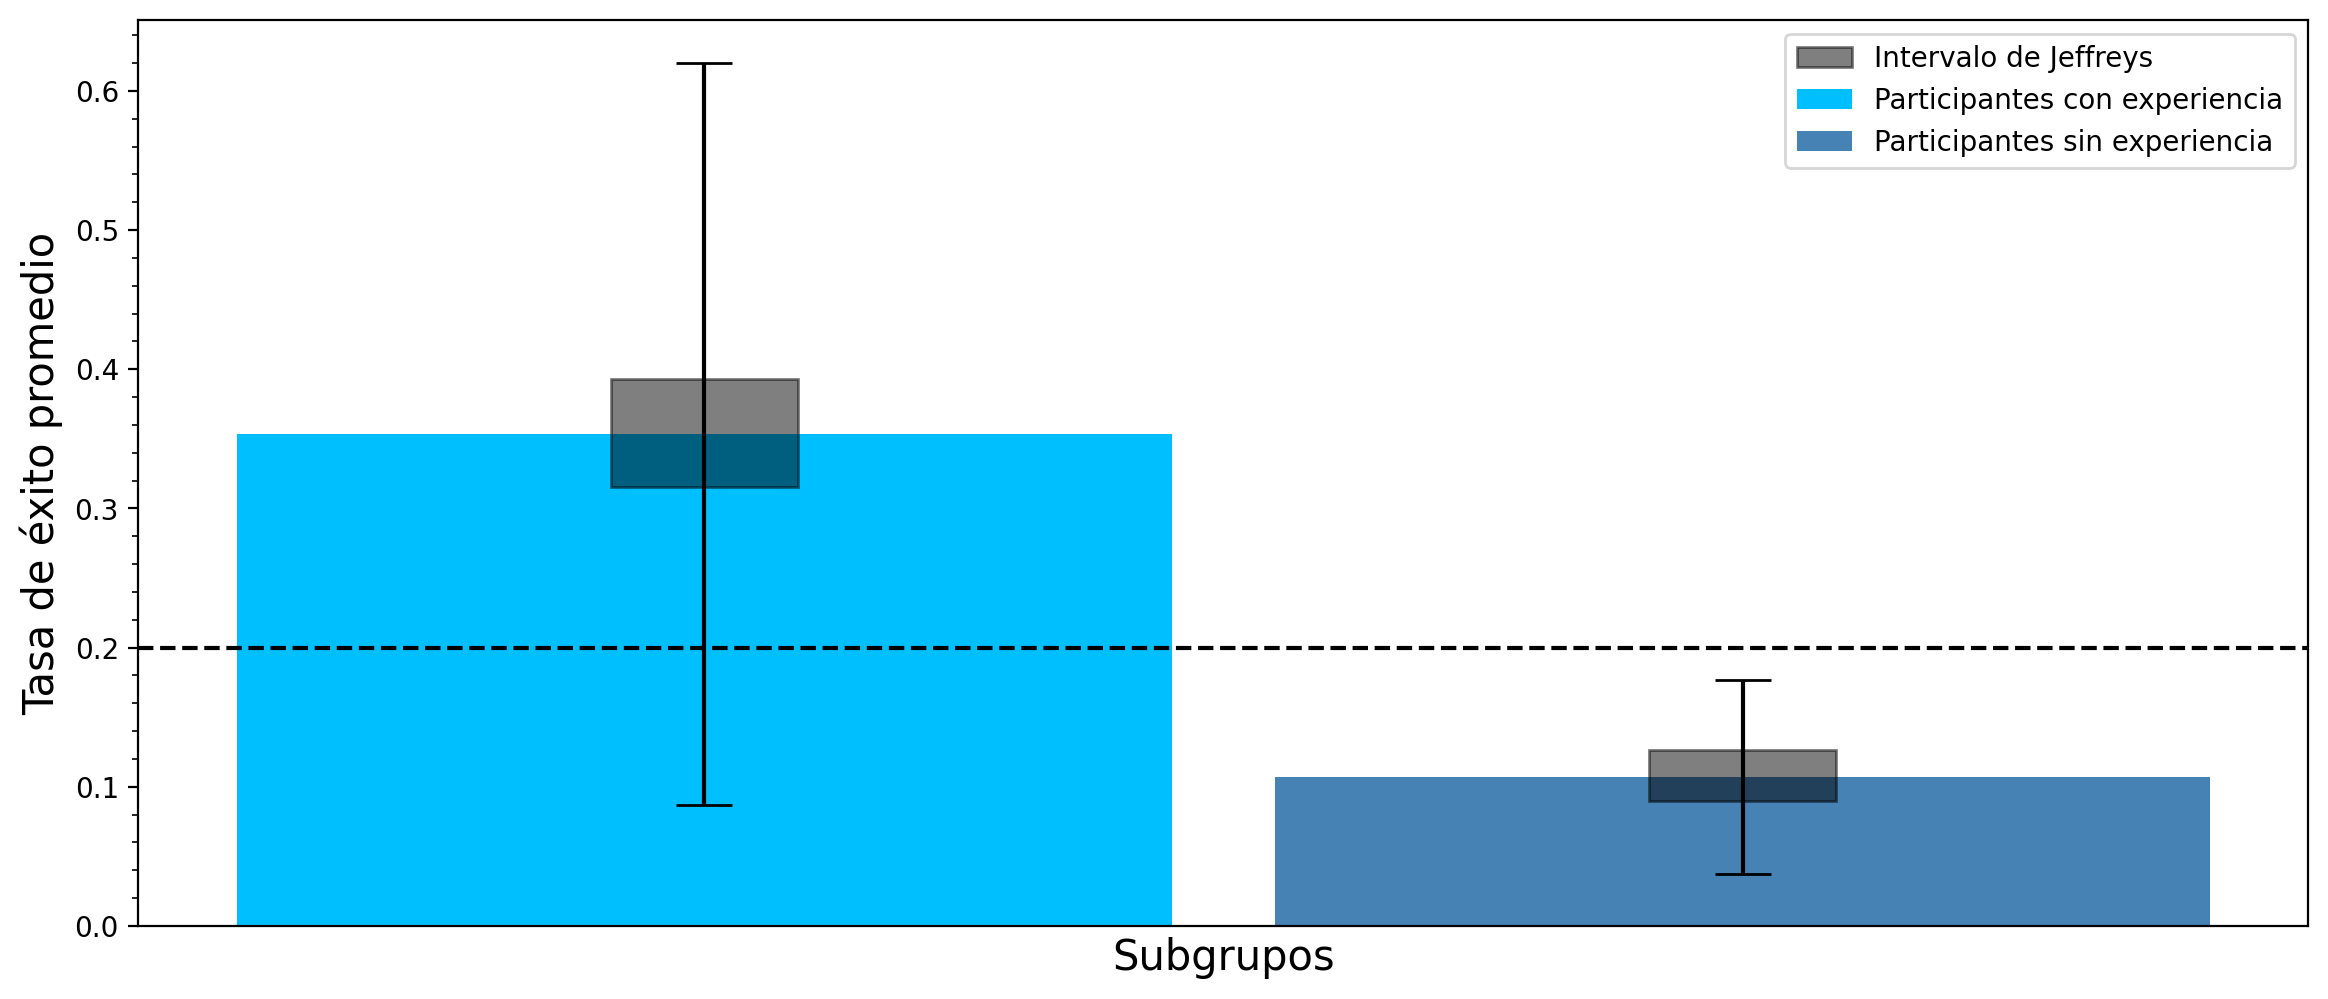

In [137]:
labels = ['Experts','Non experts']

fig, ax = plt.subplots(figsize=(14,6),dpi=200)
x = np.arange(len(labels))

bar_width = .9

rects1 = ax.bar(1 - bar_width/2, plot_data['Success'][1] , bar_width, yerr=plot_data['Std'][1], 
                label='Participantes con experiencia',color='deepskyblue', align='center',ecolor='black',capsize=10)
rects2 = ax.bar(2 - bar_width/2, plot_data['Success'][2] , bar_width, yerr=plot_data['Std'][2], 
                label='Participantes sin experiencia',color='steelblue', align='center',ecolor='black',capsize=10)
ax.set_ylabel('Tasa de éxito promedio',size=15)
ax.set_xlabel('Subgrupos',size=15)
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.add_patch(Rectangle((.46, plot_data['conf_lo'][1]), 
                       0.18, plot_data['conf_hi'][1]-plot_data['conf_lo'][1],
                       alpha=0.5,color='black',label="Intervalo de Jeffreys"))
ax.add_patch(Rectangle((1.46, plot_data['conf_lo'][2]), 
                       0.18, plot_data['conf_hi'][2]-plot_data['conf_lo'][2],
                       alpha=0.5,color='black'))

plt.axhline(y=.2, color='black', linestyle='--')

ax.set_xticks([])
ax.set_xticklabels([])

ax.legend(fontsize=10,loc='upper right')
plt.savefig('AbsEmisPlot-Thesis.png')
plt.show()

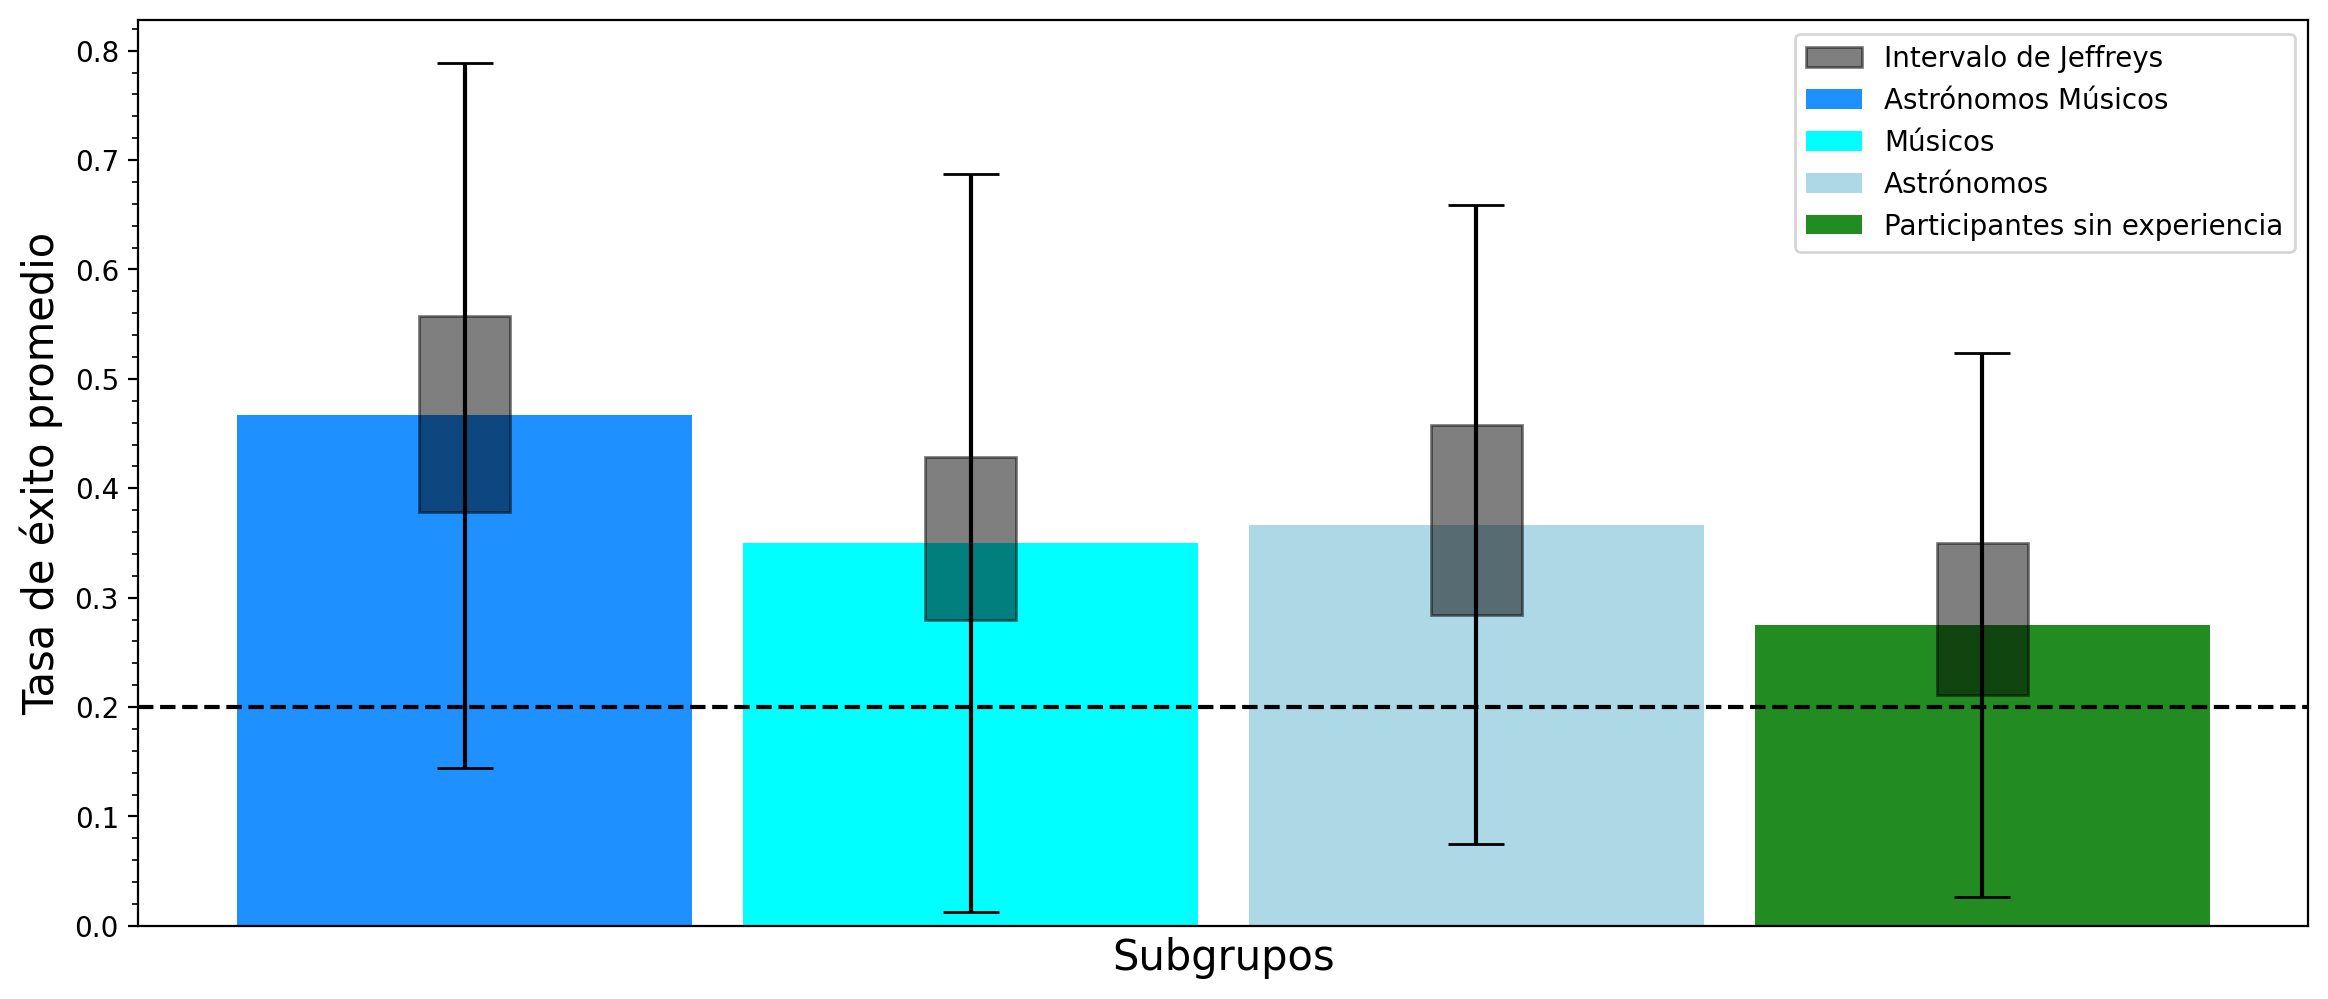

In [138]:
fig, ax = plt.subplots(figsize=(14,6),dpi=200)
x = np.arange(len(labels))
bar_width = .9
rects1 = ax.bar(1 - bar_width/2, plot_data['Success'][3] , bar_width, yerr=plot_data['Std'][3], 
                label='Astrónomos Músicos',color='dodgerblue', align='center',ecolor='black',capsize=10)
rects2 = ax.bar(2 - bar_width/2, plot_data['Success'][4] , bar_width, yerr=plot_data['Std'][4], 
                label='Músicos', color='cyan', align='center',ecolor='black',capsize=10)
rects3 = ax.bar(3 - bar_width/2, plot_data['Success'][5] , bar_width, yerr=plot_data['Std'][5], 
                label='Astrónomos', color = 'lightblue', align='center',ecolor='black',capsize=10)

rects4 = ax.bar(4 - bar_width/2, plot_data['Success'][6] , bar_width, yerr=plot_data['Std'][6], 
                label='Participantes sin experiencia', color = 'forestgreen', align='center',ecolor='black',capsize=10)


ax.set_ylabel('Tasa de éxito promedio',size=15)
ax.set_xlabel('Subgrupos',size=15)

ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.add_patch(Rectangle((.46, plot_data['conf_lo'][3]), 
                       0.18, plot_data['conf_hi'][3]-plot_data['conf_lo'][3],
                       alpha=0.5,color='black',label="Intervalo de Jeffreys"))
ax.add_patch(Rectangle((1.46, plot_data['conf_lo'][4]), 
                       0.18, plot_data['conf_hi'][4]-plot_data['conf_lo'][4],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((2.46, plot_data['conf_lo'][5]), 
                       0.18, plot_data['conf_hi'][5]-plot_data['conf_lo'][5],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((3.46, plot_data['conf_lo'][6]), 
                       0.18, plot_data['conf_hi'][6]-plot_data['conf_lo'][6],
                       alpha=0.5,color='black'))

plt.axhline(y=.2, color='black', linestyle='--')

ax.set_xticks([])
ax.set_xticklabels([])
ax.legend(fontsize=10,loc='upper right')
plt.savefig('Absemis-stats-Plot-groups-Thesis.png')
plt.show()